### Pytorch Workflow

# PyTorch Workflow Fundamentals

---

### 01. PyTorch Workflow Fundamentals

#### 1. Data (preparing and loading)
- Split data into training and test sets

#### 2. Build model
- PyTorch model building essentials
- Checking the contents of a PyTorch model
- Making predictions using `torch.inference_mode()`

#### 3. Train model
- Creating a loss function and optimizer in PyTorch
- Creating an optimization loop in PyTorch
- PyTorch training loop
- PyTorch testing loop

#### 4. Making predictions with a trained PyTorch model (inference)

#### 5. Saving and loading a PyTorch model
- Saving a PyTorch model's `state_dict()`
- Loading a saved PyTorch model's `state_dict()`

#### 6. Putting it all together
- 6.1 Data
- 6.2 Building a PyTorch linear model
- 6.3 Training
- 6.4 Making predictions
- 6.5 Saving and loading a model


SETUP

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [5]:
torch.__version__

'2.0.0+cu117'

Preparing dataset using Linear Regression Formula

In [6]:
# Y = a + bx

In [27]:
weight = 0.7 # a
bias = 0.3 # b

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
X, X.shape

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 torch.Size([50]))

In [28]:
X_unsqueezed = X.unsqueeze(dim=1)

In [29]:
X_unsqueezed.shape, X_unsqueezed

(torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

In [31]:
y = weight * X_unsqueezed + bias # its vector

In [32]:
y, y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 torch.Size([50, 1]))

In [33]:
X_unsqueezed[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

#### Splitting data into traing and test sets

In [34]:
#### Splitting data into traing and test sets

In [40]:
train_split = int(0.8 * len(X_unsqueezed))
X_train, y_train = X_unsqueezed[:train_split], y[:train_split]

test_split = len(X) - train_split
print(train_split, test_split) # 40,10
X_test, y_test = X_unsqueezed[train_split:], y[train_split:]

40 10


In [41]:
len(X_test), len(X_train), len(y_train), len(y_test)

(10, 40, 40, 10)

In [48]:
X_train, X_train.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 torch.Size([40, 1]))

Data Visualization

In [54]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train, 
                     test_data = X_test, 
                     test_labels = y_test,
                     predictions = None):

    '''  
    Plots training data, test data
    '''
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

    plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s = 4, label="predictions")

torch.Size([10, 1]) torch.Size([10, 1])


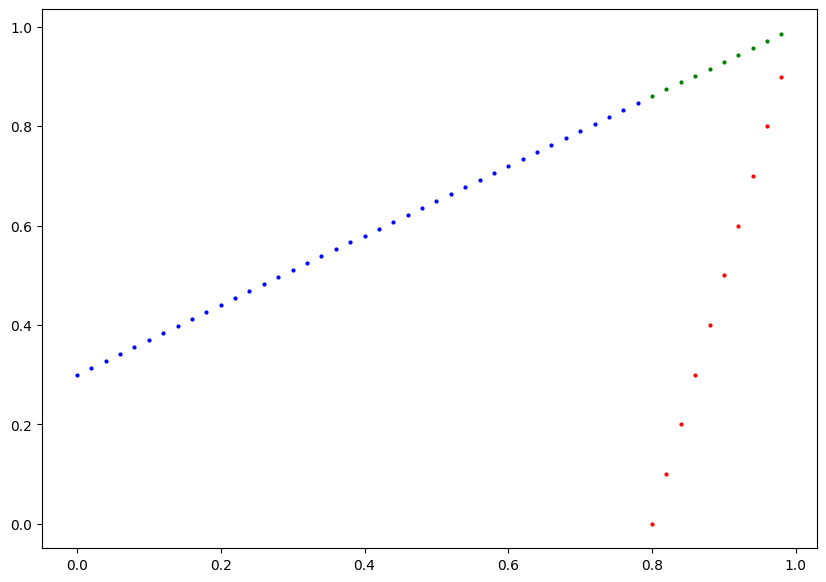

In [57]:
predictions = torch.arange(0,1, 0.1).unsqueeze(dim=1)
print(predictions.shape, y_test.shape)
plot_predictions(predictions=predictions)

Build first Pytorch model

In [58]:
class LinearReg(nn.Module): # inhherits

    def __init__(self) -> None:
        super().__init__() # calls constructor of parent class

        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        # torch.randn(1): Generates a tensor with a single random value from a normal distribution (mean 0, variance 1).
        # nn.Parameter(): Wraps the tensor as a parameter, indicating that it should be optimized during training.
        # requires_grad=True: Specifies that gradients should be computed for this parameter during backpropagation.


    def forward(self, x:torch.Tensor) -> torch.Tensor: # x is input data
        #  forward pass is the computation performed to generate the output of the model from the input data.
        # Any subclass of nn.module needs to override the forward method.
        # Defines forward computation of the model
        return self.weights * x + self.bias
    

#### Pytorch model building essentials

In [63]:
MANUAL_SEED = 42

torch.manual_seed(MANUAL_SEED)

model_linearReg = LinearReg()
model_linearReg


LinearReg()

In [64]:
list(model_linearReg.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [65]:
model_linearReg.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Make Predictions

To check our models' predictive powe, let see how well it predicts 'y_test' based on 'X_test'

In [69]:
X_test, y_test # Input and GT

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [70]:
with torch.inference_mode():
    y_preds = model_linearReg(X_test)

In [73]:
y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

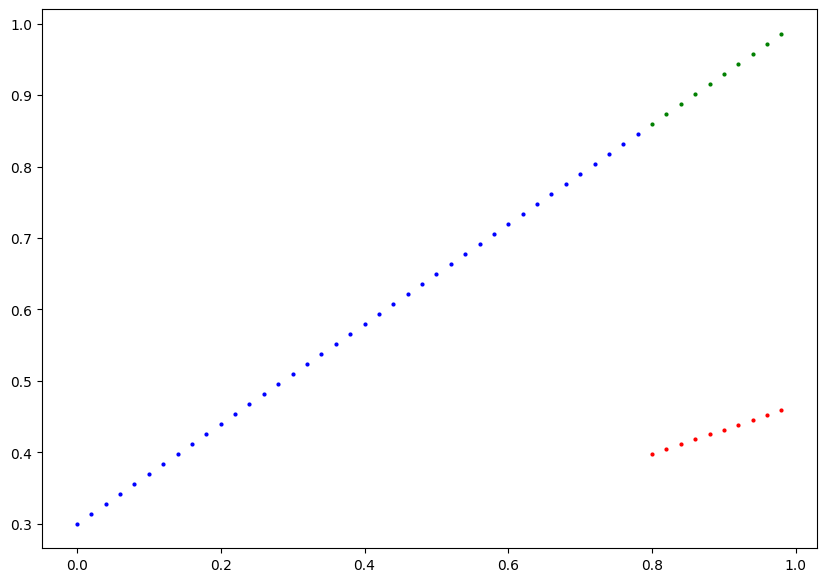

In [72]:
plot_predictions(predictions=y_preds)

In [74]:
y_pred_1 = model_linearReg(X_test)
y_pred_1

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Setting up optimizer and loss function

We can take L1 loss - Mean absoulte error between 2 coordinate points

Lets setup Loss function and OPtimizer 

In [78]:
print(model_linearReg.state_dict())
# Parameters - OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Loss Function
loss_fn = nn.L1Loss()

#Learning rate - Hyperparameter. Steps taken to optimize the parameters
lr = 1e-2

# Optimizer - pass models Parameters + LR
optimizer = torch.optim.SGD(model_linearReg.parameters(), lr)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


Training loop

Steps ->
- Loop through data
- Forward pass - calculates forward propagation - to make predictions on data.
- Calculate the loss (compare the forward pass predictions to GT labels)
- Optimizer zero grad
- Loss backward - move backwards through network to calculate the gradients of each of the parameters of our model with respect to the loss.
- Optimizer Step - use optimizer to adjust/updtae the model's parameters - to try and improve the loss


In [97]:
torch.manual_seed(42)
# Epoch is one loop through data - Hyperparameter
epochs = 100

# Loop through the data.

for epoch in range(epochs):

    # set moodel to traing mode
    # Train mode - sets all paras that requites gradients to True
    model_linearReg.train()

    #1. Forward pass
    y_pred = model_linearReg.forward(X_train)

    # 2. Calculate Loss Function
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss Backward - Perform backpropoogation on the loss wrt to the parameters 
    loss.backward()

    # 5.Optimizer Step
    optimizer.step()
    # By default, how the optimizer changes will accumulate through the loop so, 
    # we have to zero them above in step 3

    model_linearReg.eval() # turns off gradient Tracking

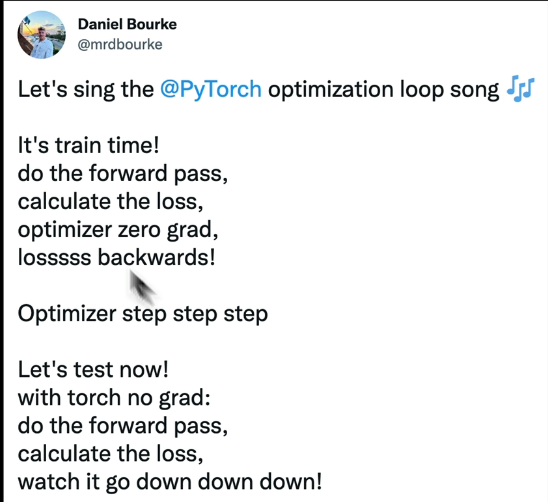

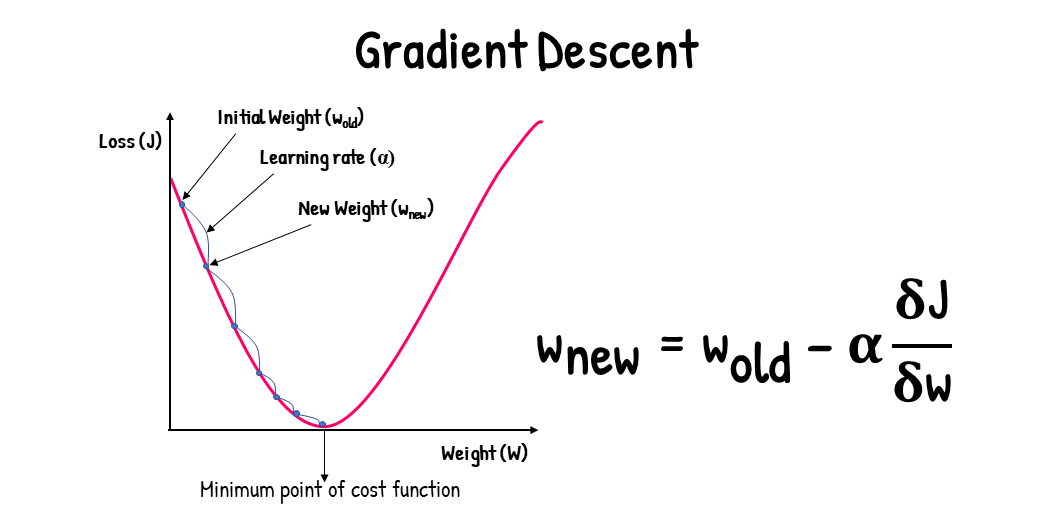

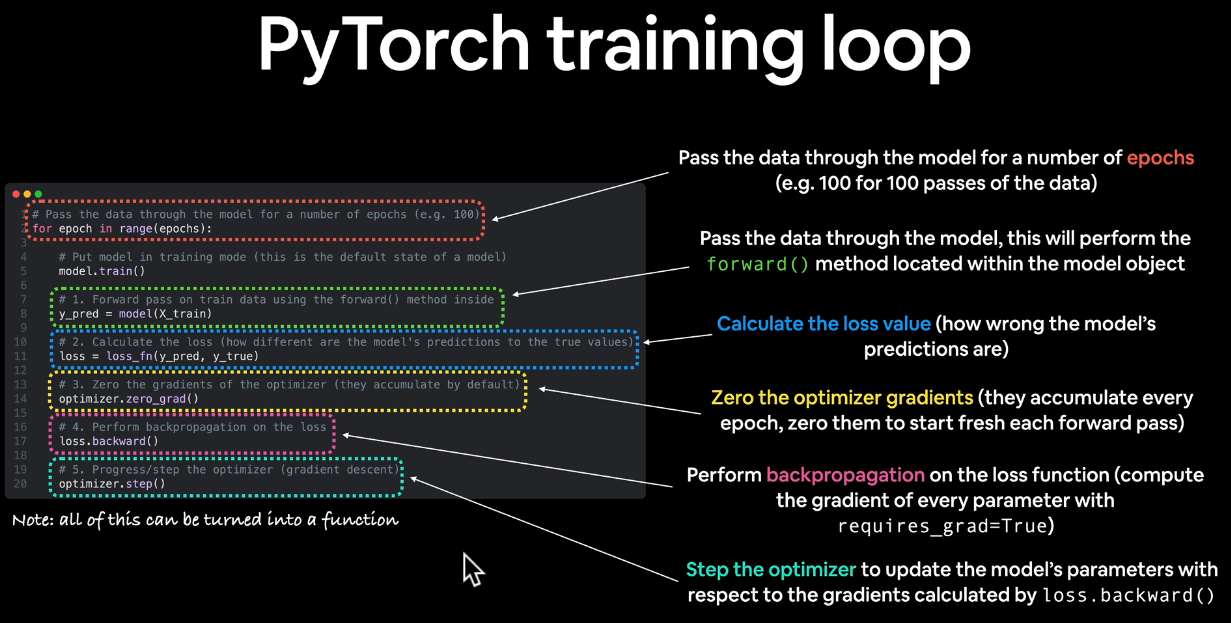

In [98]:
model_linearReg.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [100]:
with torch.inference_mode():

    y_preds_new_test = model_linearReg(X_test)

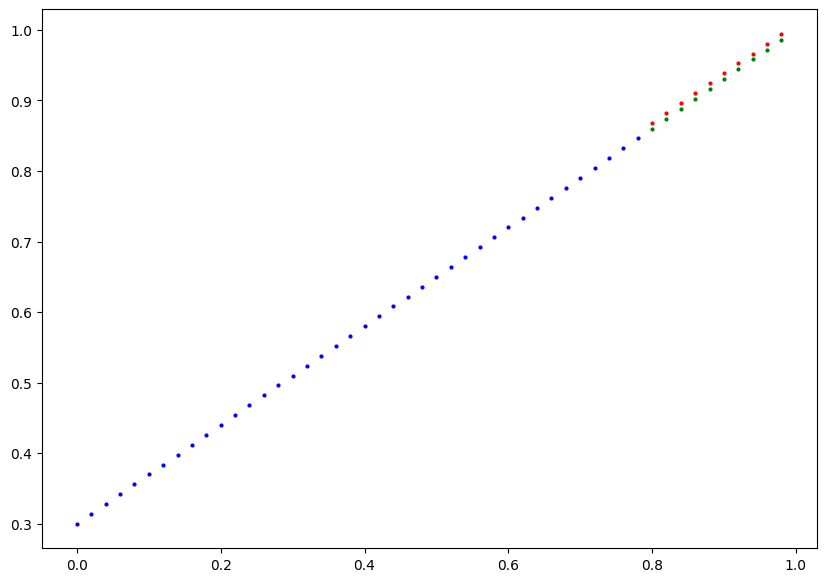

In [101]:
plot_predictions(predictions=y_preds_new_test)

Testing Loop

In [102]:
torch.manual_seed(42)
# Epoch is one loop through data - Hyperparameter
epochs = 100


# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# Loop through the data.
for epoch in range(epochs):

    # TRAINING CODE

    # set moodel to traing mode
    # Train mode - sets all paras that requites gradients to True
    model_linearReg.train()

    #1. Forward pass
    y_pred = model_linearReg.forward(X_train)

    # 2. Calculate Loss Function
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Loss Backward - Perform backpropoogation on the loss wrt to the parameters 
    loss.backward()

    # 5.Optimizer Step
    optimizer.step()
    # By default, how the optimizer changes will accumulate through the loop so, 
    # we have to zero them above in step 3


    # TESTING CODE
    model_linearReg.eval() # turns off gradient Tracking

    with torch.inference_mode():
        y_test_pred = model_linearReg.forward(X_test)

        test_loss = loss_fn(y_test_pred, y_test)

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_linearReg.state_dict())

Epoch: 0 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 10 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 20 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 30 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 40 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 50 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 60 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias',

In [104]:
y_test_pred

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

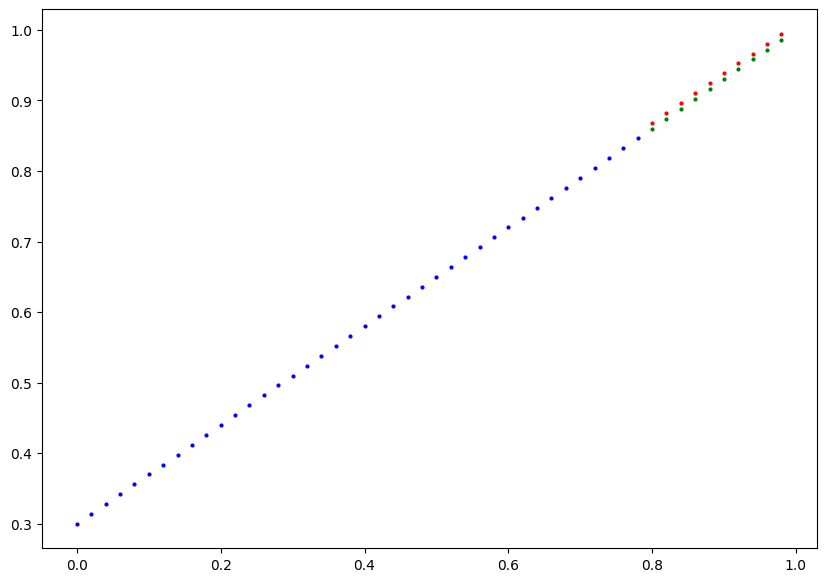

In [103]:
plot_predictions(predictions=y_test_pred)

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

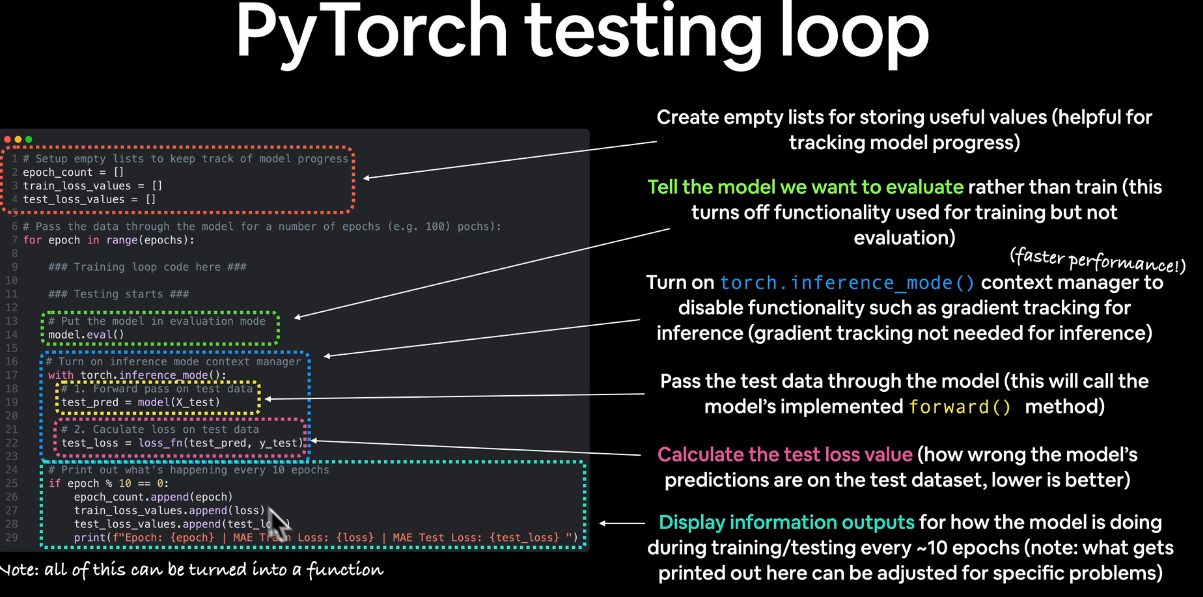

##### 3.  Save and Load Model

In [111]:
from pathlib import Path

# 1. Create directory
MODEL_PATH = Path("models")

MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_Linear_Reg.pth" # or .partition

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)
# models/01_pytorch_workflow_Linear_Reg.pth

# 3. Save the model state_dict()
torch.save(obj=model_linearReg.state_dict(), f=MODEL_SAVE_PATH)


models/01_pytorch_workflow_Linear_Reg.pth


Load the model

##### Load The model ->
- 1. Since we saved the state_dict() rather than the entire model, will now create new instance of the model class and then load the saved_dict() into that.

In [116]:
# 1. Create nee instance of model class
loaded_model = LinearReg()

# 2. Load the saved state_dict()
loaded_state_dict = torch.load(f=MODEL_SAVE_PATH)

loaded_model.load_state_dict(loaded_state_dict)

loaded_model.state_dict()
# OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [115]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### Putting it all Together

In [117]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [118]:
device

'cuda'